In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')

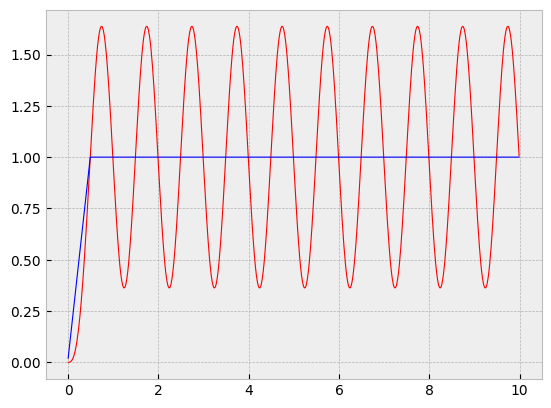

In [2]:
## Calcul de la reponse d'un systeme lineaire
## par la methode de la difference centrale
## (Chopra p.167)
## 
## acc lin gama=0.5, beta=1/6
gama=1/2
beta=1/6
## 
## interval de temps: dt
dt=1/100
## 
## nb de points: nb
nb=1000
t = np.arange(0,nb)*dt
## 
## temps de montee: Tr
Tr=0.5
## 
## vecteur de force: F
F=np.ones(nb)
for I in range(int(Tr/dt)):
    F[I]=(I+1)*dt/Tr
## 
## amortissement: z
z=0.0/100
## 
## frequence propre: f
f=1.0
## Stabilite
if 1/f/dt <= np.pi*np.sqrt(2*(gama-2*beta)):
    raise ValueError(
        f'T/dt = {1/f/dt} <= pi*sqrt(2*(gama-2*beta)) = {np.pi*np.sqrt(2*(gama-2*beta))}'
    )
## pulsation propre: w
w=2*np.pi*f
## 
## conditions initiales
u = np.zeros(nb)
v = np.zeros(nb)
## 
## 
## ****************************************************************
## Calcul initiaux kksurM, asurM, bsurM
## ****************************************************************
## 
## calculs preliminaires
a = np.zeros(nb)
a[0]=F[0]-2*z*w*v[0]-w**2*u[0]
kksurM=w**2+1/(beta*dt**2)+2*z*w*gama/beta/dt
asurM=1/beta/dt+2*z*w*gama/beta
bsurM=1/2/beta+2*z*w*dt*(gama/2/beta-1)
## 
## 
## ****************************************************************
## deplacements u, vitesses v, accelerations a
## ****************************************************************
## 
for I in range(nb-1):
	dpsurM=F[I+1]-F[I]+asurM*v[I]+bsurM*a[I]
	duI=dpsurM/kksurM
	dvI=gama/beta/dt*duI-gama/beta*v[I]+dt*(1-gama/2/beta)*a[I]
	daI=1/beta/dt**2*duI-1/beta/dt*v[I]-1/2/beta*a[I]
	u[I+1]=u[I]+duI
	v[I+1]=v[I]+dvI
	a[I+1]=a[I]+daI
## 
## dessin de la reponse
plt.plot(t,u*w**2,'r',t,F,'b', linewidth=0.8)
plt.show()
